In [34]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\spider\Documents\Springboard\GitHub\Diabetes\Data Wrangling\diabetes_cleaned-data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.000000,40.7,0.536,21,0


In [4]:
X = df.drop(columns = 'Outcome')
y = df.Outcome

In [5]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47, stratify = y)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1500, 8), X_test size: (500, 8)


In [6]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Finding Best Model for the Problem Using GridsearchCV

In [7]:
# Using GridSearchCV to find the best algorithm for this problem
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear', 'poly']
            }
        },
        
        'gradient_boosting': {
            'model': GradientBoostingClassifier(),
        'parameters': {
            'n_estimators': [10,20,50,100,200],
            'learning_rate': [0.1, 0.5, 1]
            }
        }
    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.763333
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.884667
2,random_forest,{'n_estimators': 200},0.944667
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.860000
4,gradient_boosting,"{'learning_rate': 1, 'n_estimators': 100}",0.936000


Since the random forest has the highest accuracy, we further fine tune the model using hyperparameter optimization

### Hyperparameter Tuning for Random Forest

In [20]:
parameters = {
    'n_estimators' : (10, 30, 50, 70, 90, 100),
    'criterion' : ('gini', 'entropy'),
    'max_depth' : (3, 7, 11, 15, 20, 25, 30, 35, 40, 45),
    'max_features' : ('auto', 'sqrt'),
    'min_samples_split' : (2, 4, 6)
}

In [21]:
RF_grid = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score = False), param_grid = parameters, cv = 5, verbose = True)

In [22]:
RF_grid_model = RF_grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 19.4min finished


In [23]:
RF_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [24]:
RF_grid_model.best_score_

0.9513333333333334

### Evaluating the Model

In [25]:
# Build model with best estimate
RF_Model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [26]:
RF_Model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [27]:
y_pred = RF_Model.predict(X_test)

In [28]:
print(f'Test : {RF_Model.score(X_test, y_test):.3f}')
print(f'Train : {RF_Model.score(X_train, y_train):.3f}')

Test : 0.952
Train : 0.999


### Confusion Matrix

In [30]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[317,  12],
       [ 12, 159]], dtype=int64)

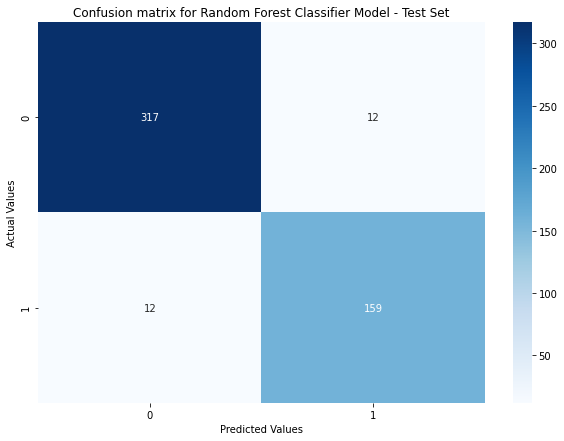

In [35]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [50]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 95.19999999999999%


In [37]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       329
           1       0.93      0.93      0.93       171

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [38]:
# Creating a confusion matrix for training set
y_train_pred = RF_Model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[987,   0],
       [  2, 511]], dtype=int64)

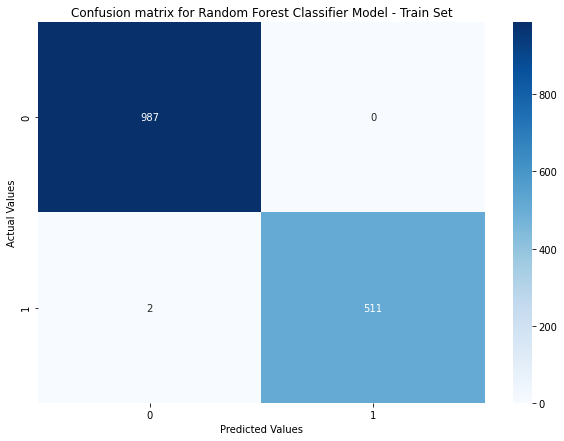

In [39]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [40]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 99.87%


In [41]:
# Classification Report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       987
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

